# Example 3: Maritime Inventory Routing Problems with the CIM

We now introduce a new problem that takes advantage of the coherent Ising machine's ability to incorporate external fields: maritime inventory routing problems (MIRP). These problems contain an external field term, and are solved with our Amplitude Heterogeneity Correction Solver. In particular, we focus on a subset of the MIRP problems known as the vehicle routing problem with time windows (VRPTW). 

## Loading J and h matrices

In [1]:
#Initialization and Imports
import sys
from pathlib import Path
sys.path.append(str(Path.cwd()) + "\\..\\") # append lib folder to list of search directories 

from cim_optimizer.solve_Ising import *
from cim_optimizer.CIM_helper import brute_force, load_adjMatrix_from_rudy

%matplotlib inline

## Loading N=308 Sequence-Based VRPTW Problem

Since our MIRP examples are saved with modified start_index and preset_size, we have to overload the load_adjMatrix_from_rudy function provided in CIM_helper.py. These problems include an external field, so both J and h matrices have to be loaded from the rudy file.

In [2]:
inst_path_str_genVRPTW = str(Path.cwd()) + "\\..\\instances\\VRPTW_TestSet\\"

# loading N=308 sequence-based MIRP problem
J, h = load_adjMatrix_from_rudy(inst_path_str_genVRPTW + "test_sb_308_f.rudy", delimiter='\t', index_start=1, preset_size=308)
J = -J # flip sign to compute minima instead of maxima
ground_state_energy = -2757.50
time_span = 10000

In [9]:
vrptw_test_run = Ising(J, h).solve(num_timesteps_per_run = time_span, target_energy = ground_state_energy)

External Field Detected
Target Ising Energy: -2757.5.
Best Ising Energy Found: -2738.5.
Corresponding Spin Configuration: [-1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
 -

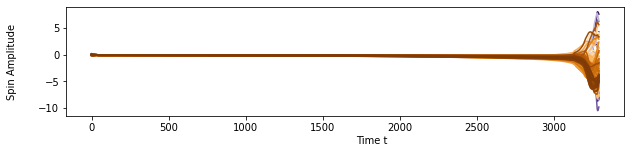

In [10]:
vrptw_test_run.result.plot_spin_trajectories(plot_type="spins")

Due to the complex nature of the maritime inventory routing problems (when converted to an Ising problem), the coherent Ising machine has difficulty achieving the global minimum. To achieve a lower energy, we utilize hyperparameter tuning. This does not significantly improve the performance of the CIM simulator, however, as the problem remains too complex to achieve low energy states.

In [7]:
vrptw_test_run = Ising(J, h).solve(num_timesteps_per_run = time_span, target_energy = ground_state_energy, hyperparameters_autotune=True, suppress_statements=True)
print(f"Minimum Energy Achieved without tuning: {vrptw_test_run.result.lowest_energy}")


External Field Detected
Tuned parameters: {'time_stop': 10000, 'batch_size': 1, 'nsub': 1, 'dt': 0.015625, 'beta': 0.05, 'delta': 0.25, 'lambd': 0.001, 'rho': 1.0, 'tau': 100, 'ahc_ext_nonlinearity': <built-in method tanh of type object at 0x00007FFEA122BF30>, 'custom_fb_schedule': None, 'custom_pump_schedule': None, 'device': device(type='cpu'), 'eps': 0.33088816729739495, 'F_h': 2.3086879882467275, 'pi': -0.1996645543905668, 'alpha': 1.103575440551821, 'noise': 0.0}.
Minimum Energy Achieved without tuning: -2743.5
